In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy import stats 
stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq, df)


import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.diagnosis.replace({'B': 0, 'M': 1}, inplace = True)

In [4]:
df_cleaned = df.copy()

input_features = list(df_cleaned.columns)
input_features.remove('diagnosis')

df_cleaned[input_features] = StandardScaler().fit_transform(df_cleaned[input_features])
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [5]:
original_features = df_cleaned.loc[: , 'radius_mean':'fractal_dimension_worst']
diagnosis = df_cleaned.loc[:, 'diagnosis']

In [6]:
pca_features = PCA().fit_transform(original_features)

In [7]:
pcaF = PCA()
pca_features = pcaF.fit_transform(pca_features)

In [8]:
pcaF.explained_variance_ratio_ #variance for each principal component

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [9]:
pcaF.explained_variance_ratio_.cumsum() #cumulative variance for principal components

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Choose principal components based on variance desired: 

In [10]:
var_cutoff = 0.85 #maximum cimulative variance desired
cum_var = pcaF.explained_variance_ratio_.cumsum() #cumulative variance for principal components
num_components = len(np.where(cum_var<=var_cutoff)[0])

In [11]:

pcaFd = pd.DataFrame(data = cum_var)


In [12]:
pca_input = pca_features[:,:num_components] #selecting the desired number of principal components as the input to the model

In [13]:
#generating column names for new dataset with reconstructed features
PC_columns=[]
for i in range(num_components):    
    PC_columns.append('PC'+str(i+1))
print(PC_columns)

['PC1', 'PC2', 'PC3', 'PC4']


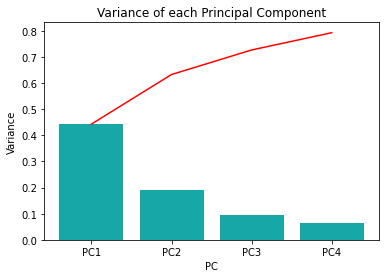

In [14]:
dfPCA = pd.DataFrame({'Variance':pcaF.explained_variance_ratio_[:num_components],
             'PC':PC_columns})
dfPCA1 = pd.DataFrame({'Variance':pcaF.explained_variance_ratio_.cumsum()[:num_components],
             'PC':PC_columns})

sns.barplot(x='PC',y="Variance", 
           data=dfPCA, color="c").set_title("Variance of each Principal Component");
sns.lineplot(x='PC',y="Variance", 
           data=dfPCA1, color="r").set_title("Variance of each Principal Component");


In [15]:
#create dataframe
pca_data = pd.DataFrame( data =  pca_input,
                    columns = PC_columns)

In [16]:
pca_data['diagnosis'] = df_cleaned['diagnosis']

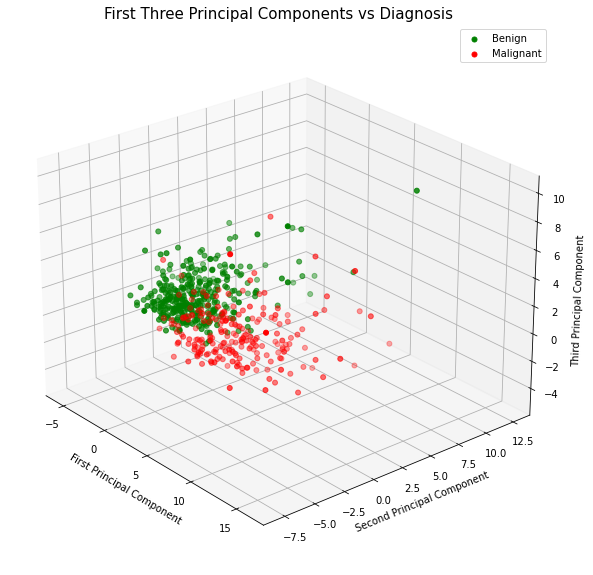

In [17]:
#plotting first 3 principal components

Xax = pca_input[:,0]
Yax = pca_input[:,1]
Zax = pca_input[:,2]
cdict = {0:'green',1:'red'}
labl = {0:'Benign',1:'Malignant'}
markr = {0:'o',1:'o'}
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for l in np.unique(df.diagnosis):
    ix=np.where(df.diagnosis==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix],c=cdict[l],s=25, 
           label=labl[l], marker=markr[l])
ax.legend(['Benign','Malignant'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('First Three Principal Components vs Diagnosis', fontsize = 15)
ax.view_init(25, 320)

Splitting the data into training and testing set so we can use our logistic model to predict how accurate it is in predicting the type of breast cancer:

In [18]:
input_features = list(pca_data.columns)
input_features.remove('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(input_features)
df_y=pca_data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(pca_data, df_y, test_size = 0.2, random_state=27)

Create regression model:

In [19]:
model = smf.glm(formula=formula, data=x_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      450
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.397
Date:                Tue, 07 Dec 2021   Deviance:                       86.795
Time:                        23:14:39   Pearson chi2:                     799.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9515      0.302     -3.155      0.0

In [21]:
predictions = logistic_fit.predict(x_test)
predictions_converted = [ 0 if x < 0.5 else 1 for x in predictions]
print(classification_report(y_test, predictions_converted, digits=4))
cfm = confusion_matrix(y_test, predictions_converted)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

              precision    recall  f1-score   support

           0     0.9583    1.0000    0.9787        69
           1     1.0000    0.9333    0.9655        45

    accuracy                         0.9737       114
   macro avg     0.9792    0.9667    0.9721       114
weighted avg     0.9748    0.9737    0.9735       114

Confusion Matrix: 
 [[69  0]
 [ 3 42]] 

True Negative: 69
False Positive: 0
False Negative: 3
True Positive: 42
